# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [43]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [44]:
train, test = keras.datasets.cifar10.load_data()

In [45]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [46]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [47]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [48]:
## 超參數設定
#LEARNING_RATE = 0.001
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
#LEARNING_RATE = [1e-1]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95


In [49]:
results = {}
optimizer = {}
for lr in LEARNING_RATE:
    exp_name_tag = "Adam_exp-lr-%s" % str(lr)
    optimizer[exp_name_tag]={'optimizer':(keras.optimizers.Adam(lr=lr))}
    exp_name_tag = "SGD_exp-lr-%s" % str(lr)
    optimizer[exp_name_tag]={'optimizer':keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)}
    exp_name_tag = "RMS_exp-lr-%s" % str(lr)
    optimizer[exp_name_tag]={'optimizer':keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)}
    exp_name_tag = "AdaGrad_exp-lr-%s" % str(lr)
    optimizer[exp_name_tag]={'optimizer':keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)}

for i,opt in enumerate(optimizer.keys()):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer[opt]['optimizer'])
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[list(optimizer.keys())[i]] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 176us/step - loss: 14.4453 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 6s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 59/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/

50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/100
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/100
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/100
50000/50000 [

50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 74/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 75/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 76/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 77/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 78/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 79/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 80/100
50000/50000 [

50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/100
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/100
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/

Epoch 88/100
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 89/100
50000/50000 [==============================] - 6s 121us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 90/100
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 91/100
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 92/100
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 93/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [

Epoch 3/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/100


Epoch 61/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 67/100
50000/50000 [==============================] - 6s 123us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/100
50000/50000 [

50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 77/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 78/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 79/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 80/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 81/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 82/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 83/100
50000/50000 [

50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/100
50000/50000 [==============================] - 6s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/100
50000/

Epoch 91/100
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 92/100
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 93/100
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/100
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [

Epoch 6/100
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/100
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/100
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/100
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/1

Epoch 64/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 67/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 68/100
50000/50000 [==============================] - 6s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 69/100
50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 70/100
50000/50000 [==============================] - 6s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/100
50000/50000 [

50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 80/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 81/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 82/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 83/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 84/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 85/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 86/100
50000/50000 [

50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100
50000/

Epoch 94/100
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train

Epoch 52/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 58/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 59/100


Epoch 10/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/100
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 68/100
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 69/100
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 70/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 71/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 72/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 73/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 74/100
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/100
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/100
50000/50000 [

50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 84/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 85/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 86/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 87/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 88/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 89/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 90/100
50000/50000 [

50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/100
50000/50000 [==============================] - 6s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/

Epoch 98/100
50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 

Epoch 56/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 58/100
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 59/100
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100


50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/100
50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/100
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/100
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/100
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/100
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/100
50000/50000 [==============================] - 6s 123us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/100
50000/

50000/50000 [==============================] - 15s 302us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 71/100
50000/50000 [==============================] - 18s 351us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 72/100
50000/50000 [==============================] - 14s 282us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 73/100
50000/50000 [==============================] - 11s 230us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 74/100
50000/50000 [==============================] - 11s 226us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 75/100
50000/50000 [==============================] - 13s 256us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 76/100
50000/50000 [==============================] - 13s 259us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 77/100

50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/100
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/100
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/100
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/100
50000/50000 

50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 86/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 87/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 88/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 89/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 90/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 91/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 92/100
50000/50000 [

50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/100
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/100
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/100
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/100
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/100
50000/

Epoch 100/100
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val

Epoch 58/100
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 59/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 4s 88us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100


dict_keys(['Adam_exp-lr-0.1', 'SGD_exp-lr-0.1', 'RMS_exp-lr-0.1', 'AdaGrad_exp-lr-0.1', 'Adam_exp-lr-0.01', 'SGD_exp-lr-0.01', 'RMS_exp-lr-0.01', 'AdaGrad_exp-lr-0.01', 'Adam_exp-lr-0.001', 'SGD_exp-lr-0.001', 'RMS_exp-lr-0.001', 'AdaGrad_exp-lr-0.001', 'Adam_exp-lr-0.0001', 'SGD_exp-lr-0.0001', 'RMS_exp-lr-0.0001', 'AdaGrad_exp-lr-0.0001', 'Adam_exp-lr-1e-05', 'SGD_exp-lr-1e-05', 'RMS_exp-lr-1e-05', 'AdaGrad_exp-lr-1e-05'])


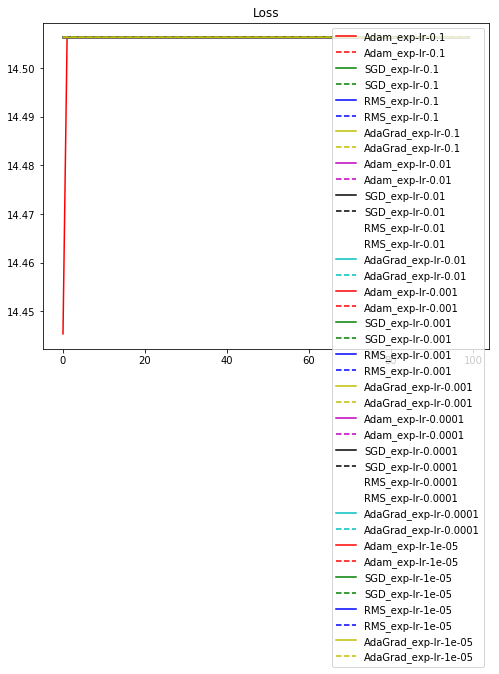

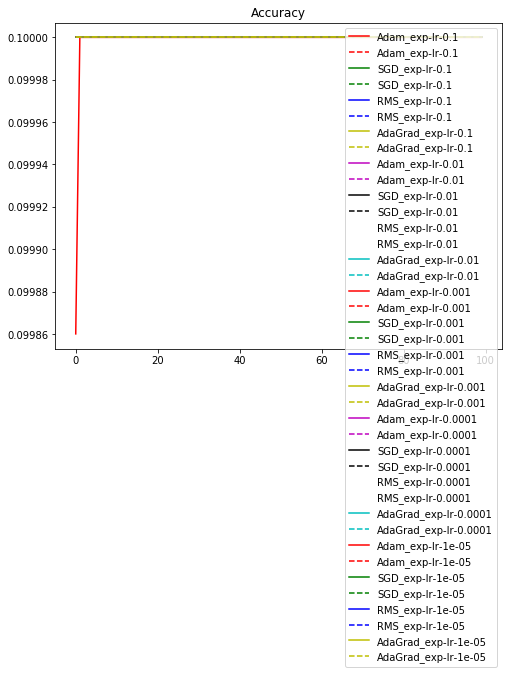

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","w","c"]

print(results.keys())
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%8])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%8])
plt.title("Accuracy")
plt.legend()
plt.show()

dict_keys(['Adam_exp-lr-0.1', 'SGD_exp-lr-0.1', 'RMS_exp-lr-0.1', 'AdaGrad_exp-lr-0.1', 'Adam_exp-lr-0.01', 'SGD_exp-lr-0.01', 'RMS_exp-lr-0.01', 'AdaGrad_exp-lr-0.01', 'Adam_exp-lr-0.001', 'SGD_exp-lr-0.001', 'RMS_exp-lr-0.001', 'AdaGrad_exp-lr-0.001', 'Adam_exp-lr-0.0001', 'SGD_exp-lr-0.0001', 'RMS_exp-lr-0.0001', 'AdaGrad_exp-lr-0.0001', 'Adam_exp-lr-1e-05', 'SGD_exp-lr-1e-05', 'RMS_exp-lr-1e-05', 'AdaGrad_exp-lr-1e-05'])


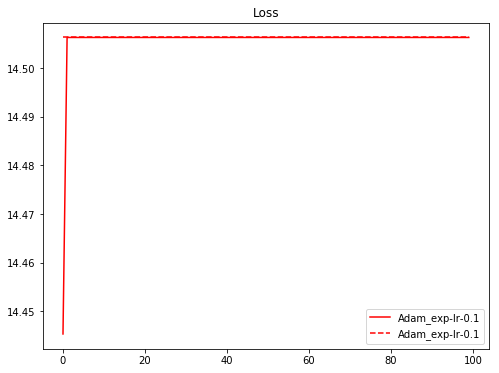

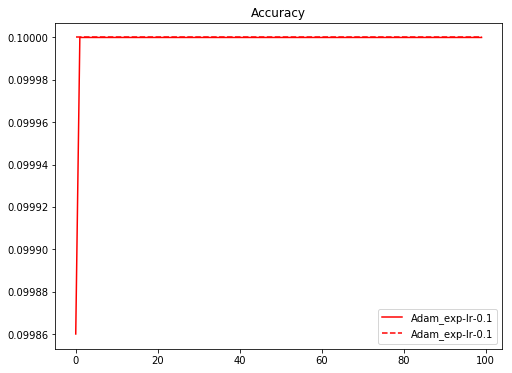

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","w","c"]

print(results.keys())
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%8])
    break
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%8])
    break
plt.title("Accuracy")
plt.legend()
plt.show()